# Models

### Imports

In [1]:
#pip install opencv-python

In [1]:
import os
import shutil
import cv2
import imghdr
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from keras import Input
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2

from PIL import Image, ImageOps

C:\Users\rockm\AppData\Local\Temp\ipykernel_36572\412957460.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
#pip list

In [6]:
#importing labels for images
labels_cleaned = pd.read_csv(r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\data\labels_cleaned.csv")

In [3]:
dataset_path = r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\train"

In [4]:
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)
image_size = (256, 256)

In [5]:
print(f'{num_classes} classes: {class_names}\nimage size: {image_size}')

4 classes: ['angry', 'happy', 'relaxed', 'sad']
image size: (256, 256)


In [6]:
images = []
labels = []

In [7]:
train_ds = image_dataset_from_directory(
    dataset_path,
    batch_size=32,
    image_size=image_size,
    subset='training',
    seed=42,
    validation_split=0.2,
    class_names=['angry', 'happy', 'relaxed', 'sad']
).map(lambda x, y: (x/255, y))

val_ds = image_dataset_from_directory(
    dataset_path,
    batch_size=32,
    image_size=image_size,
    subset='validation',
    seed=42,
    validation_split=0.2,
    class_names=['angry', 'happy', 'relaxed', 'sad']
).map(lambda x, y: (x/255, y))

Found 2797 files belonging to 4 classes.
Using 2238 files for training.
Found 2797 files belonging to 4 classes.
Using 559 files for validation.


In [8]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))

In [9]:
#train_ds

In [10]:
for x, y in train_ds:
    break

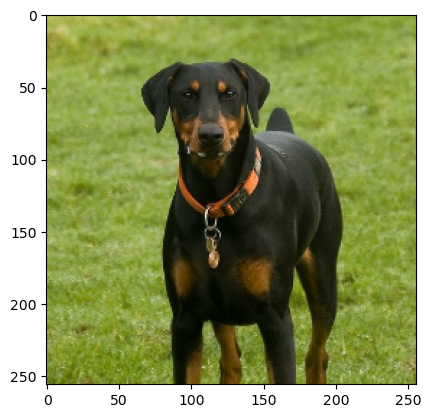

In [11]:
plt.imshow(x[4]);

In [12]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_complete")

Found 3997 files belonging to 4 classes.


In [17]:
#train_data = tf.keras.utils.image_dataset_from_directory('images/dog_emotion/train')

In [18]:
#test_data = tf.keras.utils.image_dataset_from_directory('images/dog_emotion/test')

In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
len(batch)

2

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
# label classification for images
batch[1]

array([0, 1, 2, 3, 3, 1, 2, 2, 3, 1, 2, 0, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3,
       2, 0, 0, 2, 3, 0, 0, 2, 2, 1])

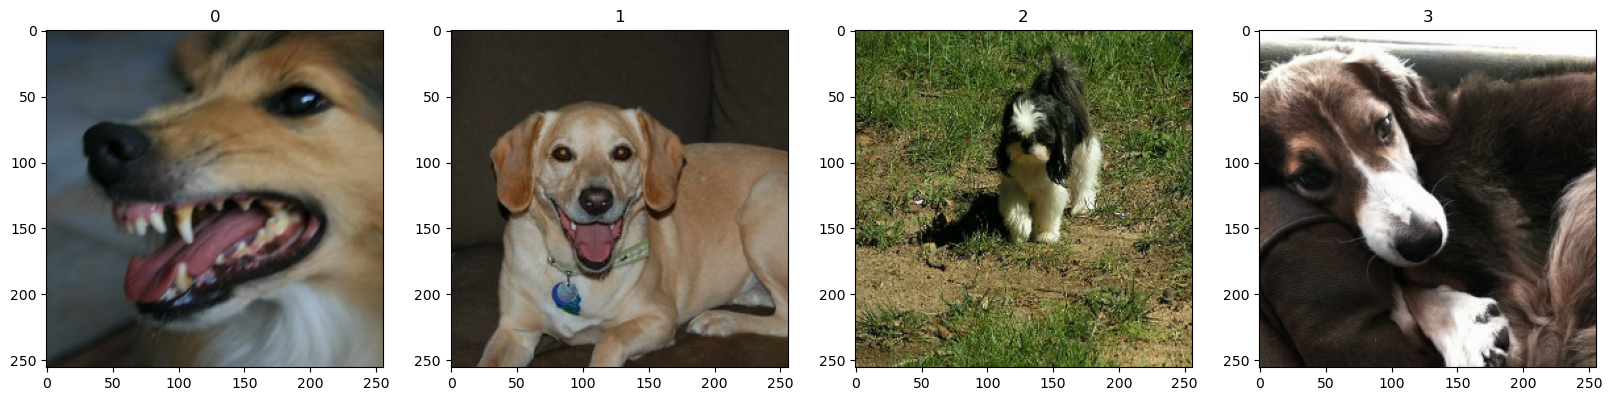

In [18]:
# figuring out which number is assigned to which emotion
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Looks like my class values are

0 - Angry

1 - Happy

2 - Relaxed

3 - Sad

## Model 1

In [25]:
model = keras.models.Sequential([
    Input(shape=(256, 256, 3)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2),
    
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2),
    
    Conv2D(256, (2, 2), activation='relu'),
    MaxPooling2D(2),
    Conv2D(256, (2, 2), activation='relu'),
    MaxPooling2D(2),
    
    Conv2D(512, (2, 2), activation='relu'),
    Flatten(),

    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='Adamax',
    metrics=['acc']
)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 512)      │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,228,548 (4.69 MB)

 Trainable params: 1,228,548 (4.69 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
model.fit(train_ds, validation_data=val_ds, epochs=25, callbacks=[early_stopping]);

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - acc: 0.2293 - loss: 1.3874 - val_acc: 0.2218 - val_loss: 1.3868
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - acc: 0.2572 - loss: 1.3864 - val_acc: 0.2218 - val_loss: 1.3867
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - acc: 0.2470 - loss: 1.3864 - val_acc: 0.2218 - val_loss: 1.3870
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - acc: 0.2468 - loss: 1.3864 - val_acc: 0.2218 - val_loss: 1.3866
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - acc: 0.2549 - loss: 1.3802 - val_acc: 0.3095 - val_loss: 1.3473
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - acc: 0.3536 - loss: 1.3231 - val_acc: 0.3220 - val_loss: 1.3009
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - acc: 0.3498 - loss: 1.2733 - val_acc: 0.3238 - val_loss: 1.2956
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - acc: 0.3572 - loss: 1.2698 - val_acc: 0.3327 - val_loss: 1.3152
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/

## Model 2

In [29]:
model2 = keras.models.Sequential([
    Input(shape=(256, 256, 3)),
    RandomFlip('horizontal_and_vertical'),
    RandomRotation(0.2),
    RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2),
    
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2),
    
    Conv2D(256, (2, 2), activation='relu'),
    MaxPooling2D(2),
    Conv2D(256, (2, 2), activation='relu'),
    MaxPooling2D(2),
    
    Conv2D(512, (2, 2), activation='relu'),
    Flatten(),

    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(4, activation='softmax')
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer='Adamax',
    metrics=['acc']
)

In [30]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 256)      │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 1, 1, 512)      │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,228,548 (4.69 MB)

 Trainable params: 1,228,548 (4.69 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model2.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping]);

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - acc: 0.2397 - loss: 1.3873 - val_acc: 0.2218 - val_loss: 1.3865
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - acc: 0.2594 - loss: 1.3864 - val_acc: 0.2218 - val_loss: 1.3867
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - acc: 0.2504 - loss: 1.3863 - val_acc: 0.2218 - val_loss: 1.3867
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - acc: 0.2516 - loss: 1.3861 - val_acc: 0.2594 - val_loss: 1.3761
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - acc: 0.2695 - loss: 1.3770 - val_acc: 0.3309 - val_loss: 1.3601


## Scaling Data

In [19]:
# max and min RGB values for images
batch[0].max()

255.0

In [20]:
batch[0].min()

0.0

In [21]:
# scaling data
scaled_data = data.map(lambda x,y: (x/255, y))

In [22]:
scaled_iterator = scaled_data.as_numpy_iterator()

In [23]:
batch[0].max()

255.0

In [25]:
# 125 batches
len(data)

125

In [26]:
train_size = int(len(scaled_data)*.7)
test_size = int(len(scaled_data)*.1)
val_size = int(len(scaled_data)*.2)+1

In [27]:
train_size + test_size + val_size

125

In [28]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

In [29]:
len(test)

12

## Model 3

In [42]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

test_generator = val_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

Found 2797 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [44]:
model3 = Sequential()

In [45]:
model3.add(Input(shape=(256, 256, 3))),
#model3.add(RandomFlip('horizontal_and_vertical')),
#model3.add(RandomRotation(0.2)),
#model3.add(RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2))),
model3.add(Conv2D(16, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(32, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(16, (3, 3), activation='relu')),
model3.add(MaxPooling2D(2)),

#model3.add(Conv2D(128, (3,3), 1, activation='relu'))
#model3.add(MaxPooling2D())

#model3.add(Conv2D(256, (3,3), 1, activation='relu'))
#model3.add(MaxPooling2D())

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
#model3.add(Dense(128, activation='relu'))
#model3.add(Dense(64, activation='relu'))
model3.add(Dense(4, activation='softmax'))

In [46]:
#model3.compile('adam', loss=tf.keras.losses.categorical_crossentropy(), metrics=['accuracy'])

In [47]:
model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adamax',
    metrics=['acc']
)

In [48]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Training model
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
#hist = model3.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[tensorboard_callback])

In [52]:
#hist = model3.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

## Model 4

In [53]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [54]:
for layer in vgg16_base.layers:
    layer.trainable = False

In [55]:
model4 = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(224, activation='relu'),
    Dense(4, activation='softmax')
])

In [56]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 2797 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [58]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model4.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/25


C:\Users\rockm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 72s 790ms/step - accuracy: 0.2774 - loss: 5.2733 - val_accuracy: 0.3875 - val_loss: 3.0120
Epoch 2/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 71s 791ms/step - accuracy: 0.4157 - loss: 2.4485 - val_accuracy: 0.4737 - val_loss: 2.3266
Epoch 3/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 71s 789ms/step - accuracy: 0.4938 - loss: 1.8641 - val_accuracy: 0.4975 - val_loss: 2.0684
Epoch 4/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 783ms/step - accuracy: 0.5192 - loss: 1.5958 - val_accuracy: 0.5125 - val_loss: 1.9587
Epoch 5/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.5636 - loss: 1.3976 - val_accuracy: 0.5362 - val_loss: 1.7755
Epoch 6/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 786ms/step - accuracy: 0.5971 - loss: 1.2549 - val_accuracy: 0.5500 - val_loss: 1.7580
Epoch 7/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 779ms/step - accuracy: 0.6332 - loss: 1.1261 - val_accuracy: 0.5675 - val_loss: 1.6905
Epoch 8/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 781ms/step - accuracy: 0.6373 - loss: 1.0963 - val_accuracy: 0.551

## Model 5

In [32]:
vgg16_base2 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [33]:
model5 = Sequential([
    vgg16_base2,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

In [34]:
model5.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model2.keras',
    monitor='val_loss',        
    save_best_only=True,       
    save_weights_only=False,   
    mode='min',                
    verbose=1                  
)

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [38]:
hist5 = model5.fit(train, epochs=25, validation_data = val, callbacks=[early_stopping, checkpoint_callback])

Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2967 - loss: 1.3956
Epoch 1: val_loss improved from inf to 1.34157, saving model to best_model2.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.2968 - loss: 1.3953 - val_accuracy: 0.3209 - val_loss: 1.3416
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3698 - loss: 1.2903
Epoch 2: val_loss improved from 1.34157 to 1.28136, saving model to best_model2.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.3699 - loss: 1.2900 - val_accuracy: 0.3377 - val_loss: 1.2814
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4519 - loss: 1.1729
Epoch 3: val_loss improved from 1.28136 to 1.04233, saving model to best_model2.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.4520 - loss: 1.1727 - val_accuracy: 0.5757 - val_loss: 1.0423
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6051 - loss: 0.9706
Epoch 4: val_loss improved from 1.04233 to 0.78330, saving model t

### Plotting Performance of Best Model

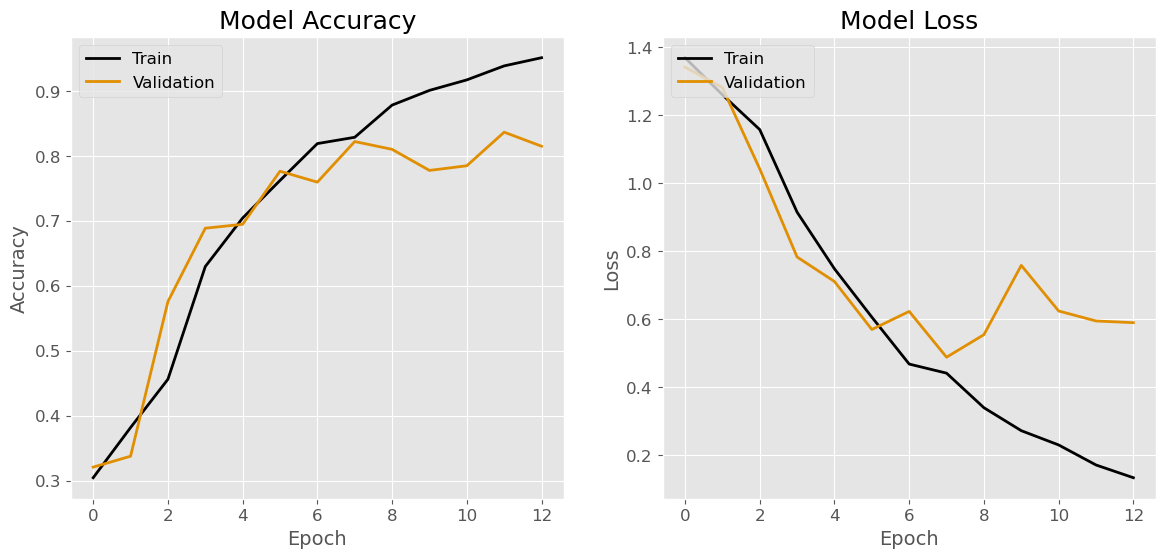

In [54]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hist5.history['accuracy'], color='black', linewidth=2)
plt.plot(hist5.history['val_accuracy'], color='#e18f02', linewidth=2)
plt.title('Model Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist5.history['loss'], color='black', linewidth=2)
plt.plot(hist5.history['val_loss'], color='#e18f02', linewidth=2)
plt.title('Model Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12)
plt.grid(True)

fig.savefig(r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\performance.png", dpi=192)

In [45]:
y_val_pred_probs = model5.predict(val_ds)
y_val_pred_classes = np.argmax(y_val_pred_probs, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 704ms/step


In [47]:
y_val_true = []
for _, labels in val_ds:
    y_val_true.extend(np.argmax(labels.numpy(), axis=1))

y_val_true = np.array(y_val_true)

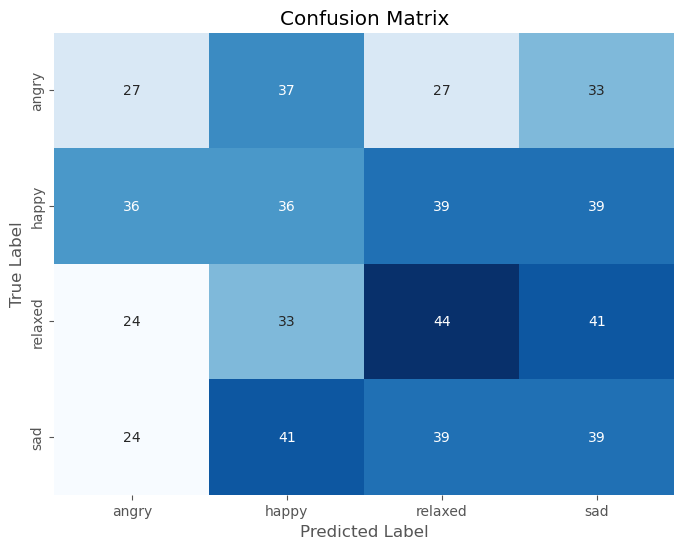

In [48]:
# without being able to load my model back in due to an issue between VGG16 and tensorflow 2.16.1+, my confusion matrix didn't work properly

# Generate the confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['angry', 'happy', 'relaxed', 'sad'],
            yticklabels=['angry', 'happy', 'relaxed', 'sad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,541,134 (169.91 MB)

 Trainable params: 14,847,044 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,694,090 (113.27 MB)

In [ ]:
model_json = model5.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
with open('model_architecture.json', 'r') as json_file:
    model_json = json_file.read()

In [ ]:
model5 = tf.keras.models.model_from_json(model_json)

## Model 6

In [65]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [66]:
for layer in vgg16_base.layers:
    layer.trainable = False

In [67]:
model6 = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(224, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [68]:
model6.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
model6.summary()

ValueError: Undefined shapes are not supported.

In [70]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 2797 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [71]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model6.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/25


C:\Users\rockm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 776ms/step - accuracy: 0.2761 - loss: 6.7842 - val_accuracy: 0.3725 - val_loss: 3.0469
Epoch 2/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 781ms/step - accuracy: 0.3522 - loss: 3.8602 - val_accuracy: 0.4238 - val_loss: 2.3562
Epoch 3/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.4152 - loss: 2.7202 - val_accuracy: 0.4412 - val_loss: 1.9037
Epoch 4/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.4371 - loss: 2.0740 - val_accuracy: 0.4675 - val_loss: 1.6610
Epoch 5/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 781ms/step - accuracy: 0.4196 - loss: 1.7829 - val_accuracy: 0.4837 - val_loss: 1.4635
Epoch 6/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 783ms/step - accuracy: 0.4452 - loss: 1.5349 - val_accuracy: 0.4900 - val_loss: 1.3639
Epoch 7/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.4697 - loss: 1.4296 - val_accuracy: 0.4825 - val_loss: 1.2936
Epoch 8/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.4681 - loss: 1.3327 - val_accuracy: 0.478

## Model 7

In [72]:
from tensorflow.keras.optimizers import AdamW

In [73]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [74]:
for layer in vgg16_base.layers:
    layer.trainable = False

In [75]:
model7 = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(224, activation='relu'),
    Dense(4, activation='softmax')
])

In [76]:
model7.compile(optimizer=AdamW(learning_rate=0.0001, weight_decay=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\rockm\Desktop\GA\Projects\Capstone-dog\images\dog_emotions_split\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model7.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Found 2797 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/25


C:\Users\rockm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 71s 784ms/step - accuracy: 0.3061 - loss: 3.9498 - val_accuracy: 0.4025 - val_loss: 2.7778
Epoch 2/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 785ms/step - accuracy: 0.4531 - loss: 2.0646 - val_accuracy: 0.4775 - val_loss: 2.2583
Epoch 3/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.5217 - loss: 1.6917 - val_accuracy: 0.4988 - val_loss: 2.0113
Epoch 4/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 781ms/step - accuracy: 0.5501 - loss: 1.3973 - val_accuracy: 0.5125 - val_loss: 1.8780
Epoch 5/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.5753 - loss: 1.3185 - val_accuracy: 0.5275 - val_loss: 1.7823
Epoch 6/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.6054 - loss: 1.1966 - val_accuracy: 0.5387 - val_loss: 1.6786
Epoch 7/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 784ms/step - accuracy: 0.6274 - loss: 1.1219 - val_accuracy: 0.5663 - val_loss: 1.6623
Epoch 8/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 782ms/step - accuracy: 0.6410 - loss: 1.0583 - val_accuracy: 0.571

### Importing best model back in

In [ ]:
# Couldn't get this to work, there appears to be an issue between VGG16 and tensorflow versions 2.16.1+

#from tensorflow.keras.models import load_model
#best_model = load_model('best_model2.keras')